1. Data Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('../DataTransformation/last_final_data.csv')

# Check for missing values
print(data.isnull().sum())

# Define features and target
X = data.drop('mean_salary', axis=1)
y = data['mean_salary']

# Categorical and numerical features
categorical_features = ['city', 'company_size', 'position', 'level', 'office', 'hybrid', 'remote']
numerical_features = ['experience', 'raise_period', 'JavaScript / TypeScript and related frameworks',
                      'C# / .NET', 'Java and related frameworks', 'Python', 'PHP', 'C, C++', 
                      'Kotlin', 'Swift', 'Golang', 'Flutter']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


city                                              0
company_size                                      0
position                                          0
level                                             0
experience                                        0
raise_period                                      0
office                                            0
hybrid                                            0
remote                                            0
mean_salary                                       0
JavaScript / TypeScript and related frameworks    0
C# / .NET                                         0
Java and related frameworks                       0
Python                                            0
PHP                                               0
C, C++                                            0
Kotlin                                            0
Swift                                             0
Golang                                            0
Flutter     

2. Model Training and Evaluation

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'{name} - MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}')

# Choose the best model (for example, Random Forest)
best_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
best_model.fit(X_train, y_train)


Linear Regression - MAE: 2310.529940268163, MSE: 110720328.67264722, R2: -0.027321764582479258
Random Forest - MAE: 1670.5678419364701, MSE: 123146835.2911594, R2: -0.14262146482695282


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['experience', 'raise_period',
                                                   'JavaScript / TypeScript '
                                                   'and related frameworks',
                                                   'C# / .NET',
                                                   'Java and related '
                                                   'frameworks',
                                                   'Python', 'PHP', 'C, C++',
                                                   'Kotlin', 'Swift', 'Golang',
                                                   'Flutter']),
                                                 ('cat', OneHotEncoder(),
                                                  ['city', 'company_size',
                                                   'position', 'level',
                                                   'office', 'hybrid',
                                                   'remote'])])),
                ('model', RandomForestRegressor(random_state=42))])

             experience  mean_salary
experience     1.000000     0.119156
mean_salary    0.119156     1.000000


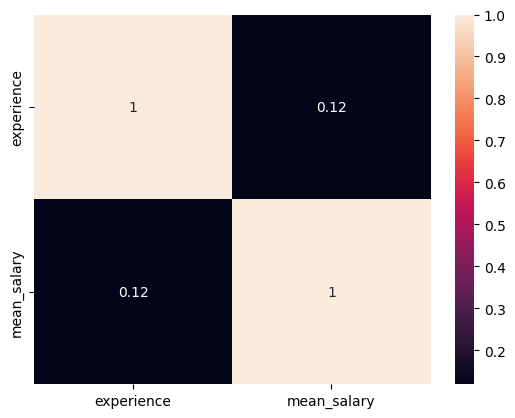

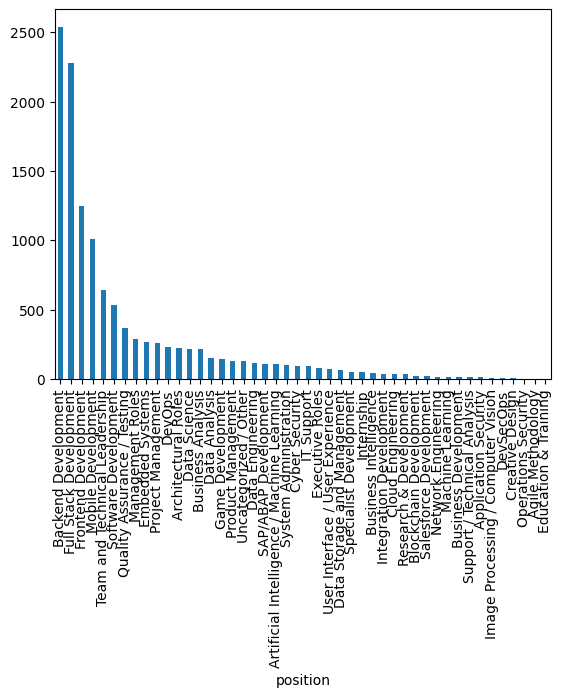

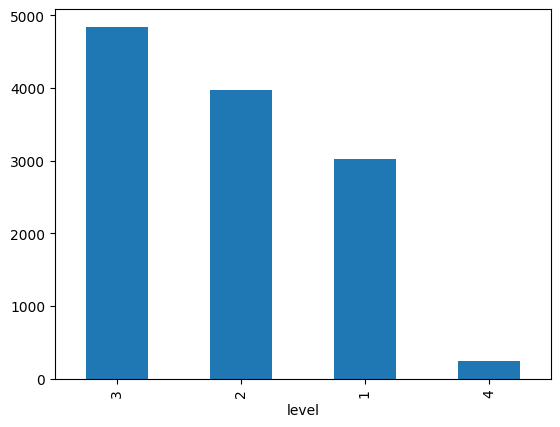

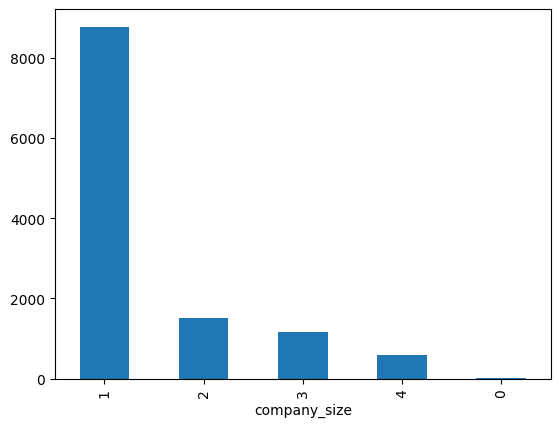

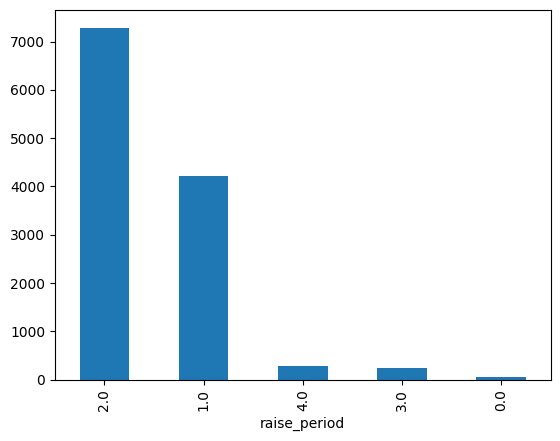

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the data (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('../DataTransformation/last_final_data.csv')
data.dropna(how="any", inplace=True)

# Separate features (X) and target (Y)
X = data.drop(columns=['mean_salary'])
Y = data['mean_salary']
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
corr = data[["experience","mean_salary"]].corr()

print(corr)

sns.heatmap(corr,annot=True)
plt.show()


data['position'].value_counts().plot(kind="bar")
plt.show()

data['level'].value_counts().plot(kind="bar")
plt.show()

data['company_size'].value_counts().plot(kind="bar")
plt.show()

data['raise_period'].value_counts().plot(kind="bar")
plt.show()

